In [2]:
%gui qt
import GPy
import numpy as np
from matplotlib import pyplot as plt
from pymodaq.utils.data import DataRaw, Axis
from pymodaq.utils import math_utils as mutils

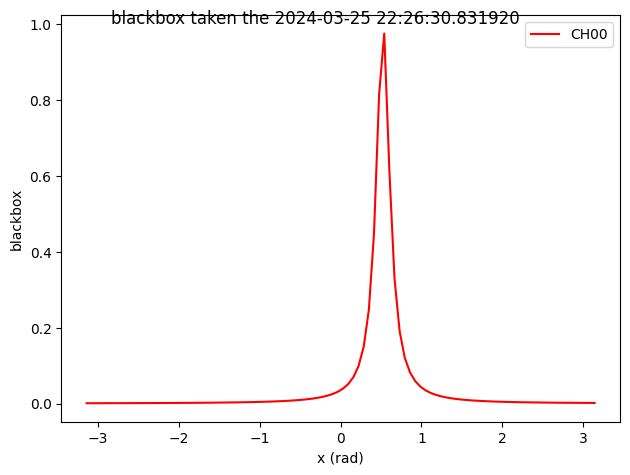

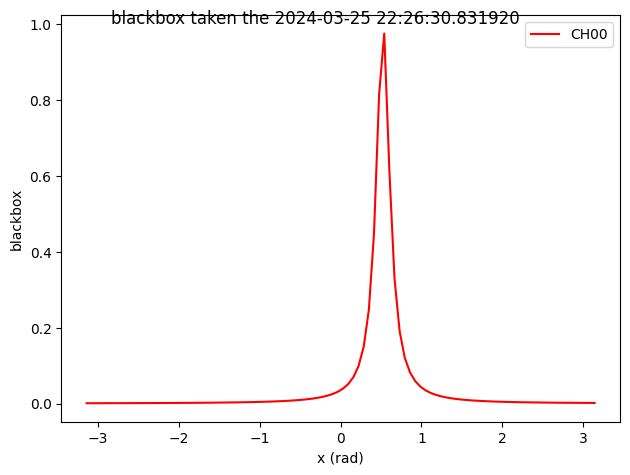

In [13]:
def black_box(x: float):
    #return (np.sin(x) + np.cos(2*x)) * mutils.gauss1D(x, 0, np.pi)
    slope = 0.1
    coeff = 1
    x0s = np.pi/6
    return (coeff * slope) ** 2 / ((coeff * slope) ** 2 + (x - x0s) ** 2)


axis = Axis('x', 'rad', data=np.linspace(-np.pi, np.pi, 100))
dwa = DataRaw('blackbox', data=[black_box(axis.get_data())], axes=[axis])

dwa.plot('matplotlib')


In [62]:
X = np.random.choice(axis.get_data(), (15,))
X = np.expand_dims(X, 1)
dwa_choice = DataRaw('choice', data=[np.squeeze(black_box(X))], axes=[Axis('choices', data=np.squeeze(X))])

Optimization restart 1/5, f = -51.2760538299205
Optimization restart 2/5, f = -52.92828513190956
Optimization restart 3/5, f = -51.27605382995516
Optimization restart 4/5, f = -51.27605382992887
Optimization restart 5/5, f = -52.928281256972426


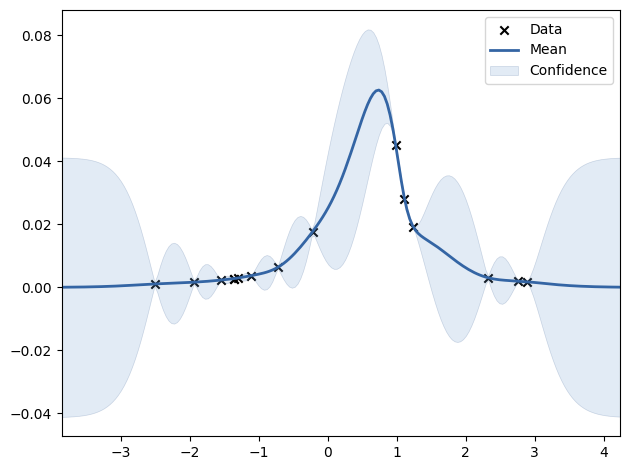

In [64]:
kernel = GPy.kern.Matern52(input_dim=1)
m = GPy.models.GPRegression(X, black_box(X), kernel)

m.optimize_restarts(5)
m.plot()

mean, variance = m.predict(np.expand_dims(axis.get_data(), 1))
quantiles = m.predict_quantiles(np.expand_dims(axis.get_data(), 1))
mean_likely = m.likelihood.gp_link.transf(mean)
variance_likely = m.likelihood.gp_link.transf(variance)
dwa_predict = DataRaw('predict', data=[np.atleast_1d(np.squeeze(mean_likely))], axes=[axis], errors=[np.atleast_1d(np.squeeze(np.abs(mean-quantiles[0])))])
viewer = dwa_predict.plot('qt', scatter_dwa=dwa_choice)